<a href="https://colab.research.google.com/github/andreafalcon05-collab/Inteligencia-Artificial/blob/main/Convolucionales/Clasificacion_digitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Dataset
Cargar los datos





In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()


Explorar dataset

In [ ]:
digits.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Imprimos la llave DEESCR para obtener informacion del conjunto de datos

In [ ]:
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

#Visualizacion de una imagen




In [ ]:
# Es necesario fijar el índice de la imagen que vamos a visualizar
index = 0


In [ ]:
#Obtener la imagen del dígito y su etiqueta
image = digits.images[index]
label = digits.target[index]


In [ ]:
#Imprimimos la representación matricial (numérica) de la imagen
print(image)


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [ ]:
#para ver la vision matricial
image.shape

(8, 8)

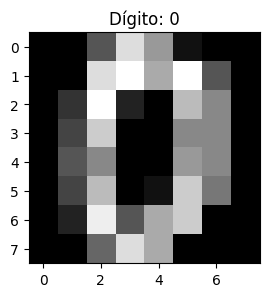

In [ ]:
#Mostrar imagen con MATPLOTLIB
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.gray)#escalas de color
plt.title(f'Dígito: {label}')
plt.show()


#Preprocesamiento de datos

Dividir los datos en connuntos de entramiento y prueba

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target,
    test_size=0.2, random_state=42
)

# One-hot encode the target variable
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


Longitud del conjunto de entramiento y de test

In [ ]:
print(X_train.shape)
print(X_test.shape)


(1437, 64)
(360, 64)


Notar como se ve el primer elementos de la variable X_TRAIN

In [ ]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
print(reshaped_tensor)


tf.Tensor(
[[ 0.  0.  3. 14.  1.  0.  0.  0.]
 [ 0.  0. 12. 12.  0.  0.  0.  0.]
 [ 0.  3. 16.  6.  0.  0.  0.  0.]
 [ 0.  5. 16.  2.  0.  0.  0.  0.]
 [ 0.  6. 16.  2.  5.  2.  0.  0.]
 [ 0.  4. 16.  2. 12. 15.  2.  0.]
 [ 0.  1. 14. 13.  2. 13. 11.  0.]
 [ 0.  0.  3. 11. 16. 13.  4.  0.]], shape=(8, 8), dtype=float64)


Escalar las imagenes para normalizar los valores de pixeles


*   **StandardScaleres**:se utiliza para estandarizar las características a una media de 0 y varianza de 1
* ** MinMaxScaler** :se utiliza para escalar las características a un rango específico, generalmente entre 0 y 1.



In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Notamos como se ve el primer elementos de la varianle X_TRAIn despues de la normalizacion

In [ ]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
# Redondeamos para tener una mejor visualizacion
reshaped_tensor =  tf.floor(reshaped_tensor * 100) / 100
print(reshaped_tensor)

tf.Tensor(
[[ 0.   -0.35 -0.47  0.5  -2.55 -1.04 -0.41 -0.14]
 [-0.07 -0.62  0.3   0.   -2.19 -1.36 -0.53 -0.14]
 [-0.05  0.12  1.08 -0.2  -1.17 -1.28 -0.56 -0.12]
 [-0.04  0.86  1.13 -1.17 -1.61 -1.29 -0.63 -0.05]
 [ 0.    1.09  1.34 -1.13 -0.91 -1.14 -0.82  0.  ]
 [-0.07  0.82  1.39 -0.83  0.69  1.17 -0.34 -0.1 ]
 [-0.04  0.15  1.14  0.64 -1.43  0.68  1.47 -0.22]
 [-0.03 -0.31 -0.5  -0.25  0.84  1.05  0.45 -0.2 ]], shape=(8, 8), dtype=float64)


In [ ]:
# Redimensionar el tensor a la forma (total, 8, 8)
X_train = tf.reshape(X_train, (X_train.shape[0], 8, 8))
X_test = tf.reshape(X_test, (X_test.shape[0], 8, 8))

#Red Nauronal Convolucional
**KERAS**


*   **Una capa convolucional** con 32 filtros, un tamaño de kernel de 3x3, y la función de activación ReLU.
*   **Una capa de max pooling** para reducir el tamaño espacial de la salida
*  **Una capa flatten** para aplanar los datos antes de pasar a las capas densas.
*   **Una capa densa** con 128 unidades y la función de activación ReLU.
*   **Una capa de salida densa** con 10 unidades (una para cada clase) y la función de activación softmax.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, kernel_size=(3, 3),
        activation='relu',
        input_shape=(8, 8, 1)
    ),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Copilar el modelo
Crear un optimizador Adam con una tasa de aprendizaje del 0.001

Se compila el modelo utilizando el optimizador Adam y la función de pérdida de entropía cruzada categórica dispersa (sparse_categorical_crossentropy) para la clasificación.

También se puede usar directamente el nombre del optimizador ('adam') en el argumento optimizer de la función compile.

In [ ]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Entrenar modelo
Se entrena el modelo en los datos de entrenamiento utilizando fit. Se especifica el número de épocas, el tamaño del lote y la proporción de validación para monitorear el rendimiento del modelo durante el entrenamiento.

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4459 - loss: 1.9487 - val_accuracy: 0.8507 - val_loss: 0.9457
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8821 - loss: 0.7296 - val_accuracy: 0.8715 - val_loss: 0.4233
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9279 - loss: 0.3232 - val_accuracy: 0.9201 - val_loss: 0.2885
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9607 - loss: 0.1784 - val_accuracy: 0.9306 - val_loss: 0.2360
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9841 - loss: 0.1121 - val_accuracy: 0.9479 - val_loss: 0.1687
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9798 - loss: 0.1091 - val_accuracy: 0.9549 - val_loss: 0.1332
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9811 - loss: 0.0754 - val_accuracy: 0.9549 - val_loss: 0.1342
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9910 - loss: 0.0594 - val_accuracy: 0.9583 - val_loss

#Funcion de perdida
Se nota que la función de pérdida debe tender hacia cero.

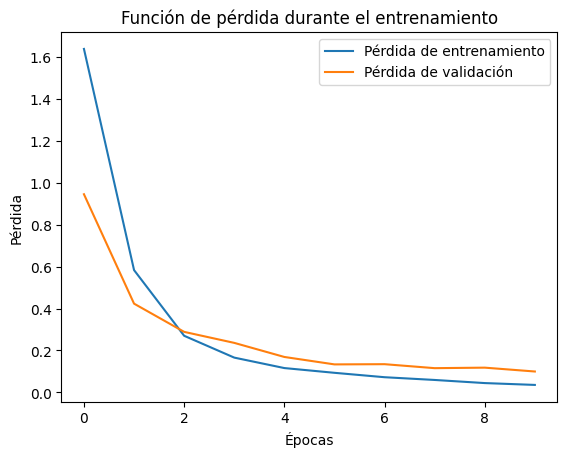

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


#Evalucion
Se evalúa el rendimiento del modelo en el conjunto de prueba utilizando evaluate. Se obtienen la pérdida y la precisión del modelo en los datos de prueba.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9781 - loss: 0.0746  
Loss: 0.07470454275608063, Accuracy: 0.9750000238418579


#Matriz de confusion y la sensabilidad (recall)
Se calculan las predicciones del modelo en el conjunto de prueba y se obtienen las clases predichas. Se calcula la matriz de confusión utilizando confusion_matrix. Se calcula la sensibilidad (recall) para cada clase utilizando recall_score.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert y_test back to multiclass format
y_test_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


#Visualizar matriz de confusion y mostrar la sensibilidad para cada clase
Se visualiza la matriz de confusión como una imagen de colores utilizando sns.heatmap. Se muestra la sensibilidad (recall) para cada clase.

**Recall**
indica qué tan efectivo es el modelo para encontrar todas las instancias positivas en comparación con el total de instancias positivas reales en el conjunto de datos.
*   Un recall de 1.0 (100%) significa que el modelo identifica todas las instancias positivas correctamente, es decir, no hay falsos negativos.

*   Un recall de 0.0 (0%) indica que el modelo no identifica ninguna instancia positiva correctamente, es decir, todos los casos positivos son clasificados como negativos (falsos negativos).

un recall alto es deseable en problemas donde la detección de instancias positivas es crítica, mientras que un recall bajo puede indicar que el modelo necesita mejorar su capacidad para identificar verdaderos positivos.



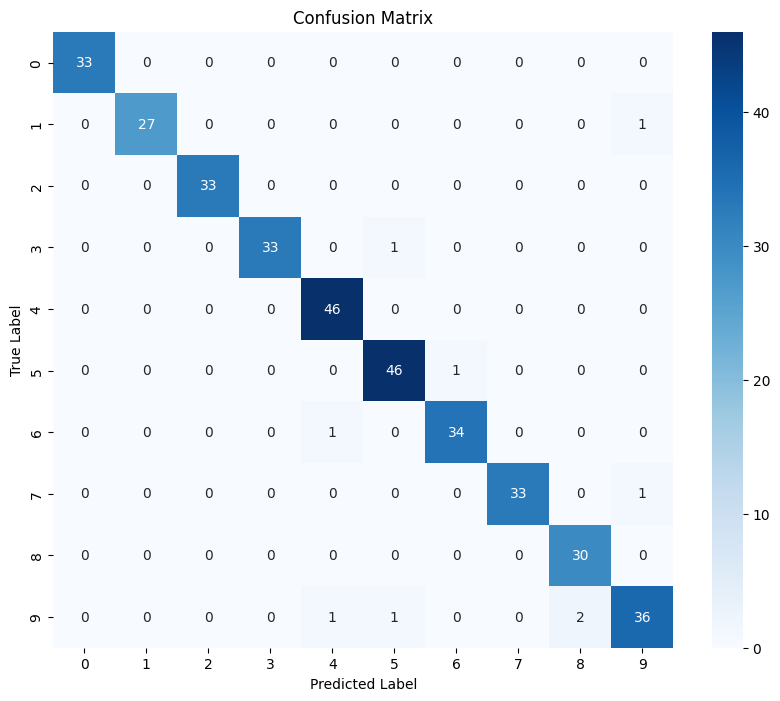

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 0.9642857142857143
Class 2: 1.0
Class 3: 0.9705882352941176
Class 4: 1.0
Class 5: 0.9787234042553191
Class 6: 0.9714285714285714
Class 7: 0.9705882352941176
Class 8: 1.0
Class 9: 0.9


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión como una imagen de colores
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(10):
    print(f'Class {i}: {sensitivity[i]}')

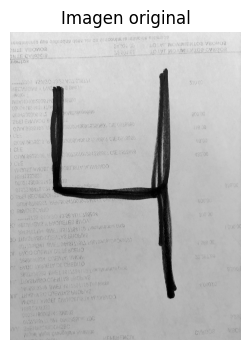

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Cambia por el nombre de tu archivo
ruta = "/content/mi_numero.png"
# Escala de grises ("L")
img = Image.open(ruta).convert("L")

# mostrar la imagen
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.title("Imagen original")
plt.axis("off")
plt.show()


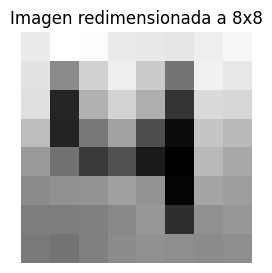

In [ ]:
import matplotlib.pyplot as plt

# redimensionar a 8x8
img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)

# mostrar imagen
plt.figure(figsize=(3, 3))
plt.imshow(img_resized, cmap="gray")
plt.title("Imagen redimensionada a 8x8")
plt.axis("off")
plt.show()

# opcional, guardamos la imagen si es necesario
img_resized.save("imagen_8x8.png")


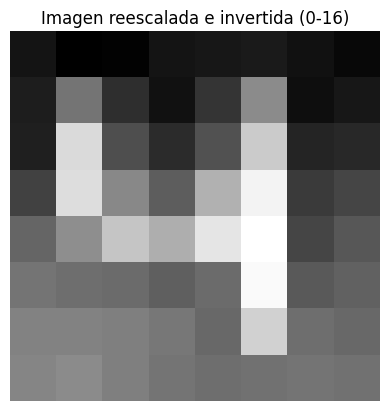

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# reescalar de 0-255 a 0-16 e invertir (fondo negro = 0)
img_array = np.array(img_resized).astype("float32")
img_array = 16 - (img_array / 255 * 16)

# mostrar imagen
plt.imshow(img_array, cmap="gray")
plt.title("Imagen reescalada e invertida (0-16)")
plt.axis("off")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# normalizar
scaler = StandardScaler()
img_flat = img_array
img_scaled = scaler.fit_transform(img_flat)

# Dar forma (1,8,8) que es el input del modelo
img_tensor = img_scaled.reshape(1, 8, 8)

In [ ]:
img_tensor

array([[[-1.3132032 , -2.0818071 , -1.7881407 , -1.2689707 ,
         -1.4171813 , -2.0335789 , -1.2674499 , -1.6081523 ],
        [-1.1174462 , -0.2861784 , -1.0106883 , -1.3260031 ,
         -0.94674766, -0.537172  , -1.3460515 , -1.2159201 ],
        [-1.0521939 ,  1.2849966 , -0.4405565 , -0.8127116 ,
         -0.47631404,  0.30695546, -0.7172391 , -0.7452413 ],
        [-0.26916587,  1.329888  ,  0.5960468 ,  0.15683907,
          1.0761169 ,  0.8441271 , -0.16702828,  0.03922323],
        [ 0.51386213,  0.11783804,  1.6844811 ,  1.753746  ,
          1.9228975 ,  0.9976047 ,  0.1473779 ,  0.50990194],
        [ 0.8401238 , -0.3759598 ,  0.07774515,  0.21387146,
         -0.05292378,  0.92086595,  0.6975887 ,  0.8236878 ],
        [ 1.1663854 , -0.06172482,  0.4405563 ,  0.6701306 ,
         -0.09996714,  0.38369426,  1.2477995 ,  0.9805807 ],
        [ 1.2316378 ,  0.07294733,  0.4405563 ,  0.6130982 ,
         -0.00588042, -0.88249665,  1.4050026 ,  1.2159201 ]]],
      dtype=fl

In [ ]:
pred = model.predict(img_tensor)
digit = np.argmax(pred)
print("Predicción:", digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicción: 4
